In [2]:
!wget http://www.vision.caltech.edu/Image_Datasets/Caltech256/256_ObjectCategories.tar

--2020-01-30 12:59:29--  http://www.vision.caltech.edu/Image_Datasets/Caltech256/256_ObjectCategories.tar
Resolving www.vision.caltech.edu (www.vision.caltech.edu)... 34.208.54.77
Connecting to www.vision.caltech.edu (www.vision.caltech.edu)|34.208.54.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1183006720 (1.1G) [application/x-tar]
Saving to: ‘256_ObjectCategories.tar’

256_ObjectCategorie 100%[===================>]   1.10G  5.94MB/s    in 2m 25s  

2020-01-30 13:01:55 (7.77 MB/s) - ‘256_ObjectCategories.tar’ saved [1183006720/1183006720]



In [0]:
!tar -xf 256_ObjectCategories.tar

In [4]:
import glob
import cv2 as cv
import keras

Using TensorFlow backend.


In [5]:
test = []
train = []
output = []
image_list = []

for i in range(1, 258):
  if i<10:
    name = '00' + str(i)
  elif i<100:
    name = '0' + str(i)
  else:
    name = str(i)
  files = glob.glob('256_ObjectCategories/' + name+ '*/*')
  test_len = int(len(files) * 0.2)
  for filename in files[:test_len]: 
    im = cv.imread(filename)
    if im is None:
      continue
    test.append(im)
  for filename in files[test_len:]: 
    im = cv.imread(filename)

    if im is None:
      continue
    train.append(im)
    output.append(i)
print(len(train))
print(len(test))


24580
6027


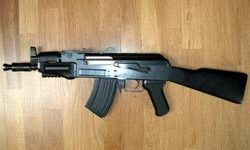

In [6]:
from google.colab.patches import cv2_imshow
cv2_imshow(train[0])

In [0]:
# cv2_imshow(test[0])
# print(test[0].shape)
import math
min1 = math.inf
min2 = math.inf
for train_img in train:
  if train_img.shape[0] < min1:
    min1 = train_img.shape[0]
  if train_img.shape[1] < min2:
    min2 = train_img.shape[1]
print(min1, min2)
  

75 75


In [8]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

new_size = [50, 50]
new_train = []

for i in range(len(train)):
  if train[i] is None:
    print('none')
for j in range(len(train)):
  if j % 1000 == 0:
    print(j)
  train_img = train[j]
  new_train_img = np.ndarray((new_size[0]*new_size[1]*3, ))
  kernel_size = [int(train_img.shape[0]/new_size[0]), int(train_img.shape[1]/new_size[1])]
  for i in range(int(len(new_train_img) / 3)):
    row = int(i/ new_size[0])
    col = int(i% new_size[1])
    point_in_orig =  [row * kernel_size[0], col * kernel_size[1]]
    for k in range(3):
      sum = np.sum(train_img[point_in_orig[0] : point_in_orig[0] + kernel_size[0], point_in_orig[1] : point_in_orig[1] + kernel_size[1], k])
      # for x in range(point_in_orig[0], point_in_orig[0] + kernel_size[0]):
      #   for y in range(p   oint_in_orig[1], point_in_orig[1] + kernel_size[1]):
      #     new_train_img[i] += train_img[x][y]
      new_train_img[i * 3 + k] = sum
      new_train_img[i * 3 + k] /= kernel_size[0] * kernel_size[1]
      new_train_img[i * 3 + k] = int(new_train_img[i * 3 + k])
  new_train.append(new_train_img)

print(new_train[0].shape)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
(7500,)


In [9]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

new_size = [50, 50]
new_test = []

for i in range(len(test)):
  if test[i] is None:
    print('none')
for j in range(len(test)):
  if j % 1000 == 0:
    print(j)
  test_img = test[j]
  new_test_img = np.ndarray((new_size[0]*new_size[1]*3, ))
  kernel_size = [int(test_img.shape[0]/new_size[0]), int(test_img.shape[1]/new_size[1])]
  for i in range(int(len(new_test_img) / 3)):
    row = int(i/ new_size[0])
    col = int(i% new_size[1])
    point_in_orig =  [row * kernel_size[0], col * kernel_size[1]]
    for k in range(3):
      sum = np.sum(test_img[point_in_orig[0] : point_in_orig[0] + kernel_size[0], point_in_orig[1] : point_in_orig[1] + kernel_size[1], k])
      # for x in range(point_in_orig[0], point_in_orig[0] + kernel_size[0]):
      #   for y in range(point_in_orig[1], point_in_orig[1] + kernel_size[1]):
      #     new_test_img[i] += test_img[x][y]
      new_test_img[i * 3 + k] = sum
      new_test_img[i * 3 + k] /= kernel_size[0] * kernel_size[1]
      new_test_img[i * 3 + k] = int(new_test_img[i * 3 + k])
  new_test.append(new_test_img)

print(new_test[0].shape)

0
1000
2000
3000
4000
5000
6000
(7500,)


In [10]:
train_data = np.zeros((len(new_train), new_size[0] * new_size[1] * 3))
test_data = np.zeros((len(new_test), new_size[0] * new_size[1] * 3))

output_data = np.zeros((len(output), 257))

print(train_data.shape)
print(output_data.shape)

for i in range(len(new_train)):
  data = new_train[i]
  for j in range(new_size[0] * new_size[1] * 3):
    train_data[i][j] = data[j]
  output_data[i][output[i] - 1] = 1

for i in range(len(new_test)):
  data = new_test[i]
  for j in range(new_size[0] * new_size[1] * 3):
    test_data[i][j] = data[j]

print(test_data.shape)

(24580, 7500)
(24580, 257)
(6027, 7500)


Epoch 1/10
24580/24580 [==============================] - 57s 2ms/step - loss: 16.0691 - acc: 0.0030
Epoch 2/10
24580/24580 [==============================] - 56s 2ms/step - loss: 16.0689 - acc: 0.0031
Epoch 3/10
24580/24580 [==============================] - 56s 2ms/step - loss: 16.0689 - acc: 0.0031
Epoch 4/10
24580/24580 [==============================] - 56s 2ms/step - loss: 16.0689 - acc: 0.0031
Epoch 5/10
24580/24580 [==============================] - 56s 2ms/step - loss: 16.0689 - acc: 0.0031
Epoch 6/10
24580/24580 [==============================] - 56s 2ms/step - loss: 16.0689 - acc: 0.0031
Epoch 7/10
24580/24580 [==============================] - 56s 2ms/step - loss: 16.0689 - acc: 0.0031
Epoch 8/10
24580/24580 [==============================] - 56s 2ms/step - loss: 16.0689 - acc: 0.0031
Epoch 9/10
24580/24580 [==============================] - 56s 2ms/step - loss: 16.0689 - acc: 0.0031
Epoch 10/10
24580/24580 [==============================] - 3s 128us/step
Accuracy: 0.31
16.

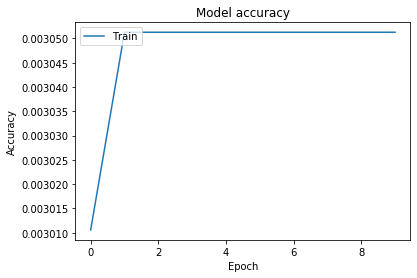

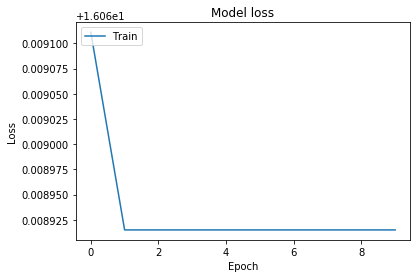

In [12]:
from keras import optimizers
import matplotlib.pyplot as plt

# output = np.ndarray((len(output), ))
model = Sequential()
model.add(Dense(6000, input_dim=new_size[0] * new_size[1] * 3, activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(257, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_data, output_data, epochs = 10, batch_size = 10)

golmorad, accuracy = model.evaluate(train_data, output_data)
print('Accuracy: %.2f' % (accuracy*100))
print(golmorad)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [13]:
from keras import optimizers
import matplotlib.pyplot as plt

# output = np.ndarray((len(output), ))
model = Sequential()
model.add(Dense(200, input_dim=new_size[0] * new_size[1] * 3, activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(5000, activation='relu'))
model.add(Dense(2500, activation='relu'))
model.add(Dense(257, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_data, output_data, epochs = 20, batch_size = 10)

error, accuracy = model.evaluate(test_data, output_data)
print('Accuracy: %.2f' % (accuracy*100))
print(error)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [0]:
train_cnn = np.zeros((len(new_train), new_size[0] , new_size[1] , 3))
test_cnn = np.zeros((len(new_test), new_size[0] , new_size[1] , 3))

output_cnn = np.zeros((len(output), 257))

print(train_cnn.shape)
print(output_data.shape)

for i in range(len(new_train)):
  data = new_train[i]
  for j in range(new_size[0] * new_size[1] * 3):
    pixel_counter = int(j / 3)
    row = int(pixel_counter / new_size[0])
    col = int(pixel_counter % new_size[1])
    train_cnn[i][row][col][j % 3] = data[j]
  output_data[i][output[i] - 1] = 1


for i in range(len(new_test)):
  data = new_test[i]
  for j in range(new_size[0] * new_size[1] * 3):
    pixel_counter = int(j / 3)
    row = int(pixel_counter / new_size[0])
    col = int(pixel_counter % new_size[1])
    test_cnn[i][row][col][j % 3] = data[j]

print('done')

(24580, 50, 50, 3)
(24580, 257)
done


(24580, 50, 50, 3)
(24580, 50, 50, 3)
Train on 24580 samples, validate on 24580 samples
Epoch 1/40
24580/24580 [==============================] - 7s 277us/step - loss: 14.8352 - acc: 0.0269 - val_loss: 14.8153 - val_acc: 0.0269
Epoch 2/40
24580/24580 [==============================] - 5s 220us/step - loss: 14.3374 - acc: 0.0272 - val_loss: 12.9742 - val_acc: 0.0260
Epoch 3/40
24580/24580 [==============================] - 5s 218us/step - loss: 12.9561 - acc: 0.0336 - val_loss: 12.8325 - val_acc: 0.0446
Epoch 4/40
24580/24580 [==============================] - 5s 223us/step - loss: 12.8217 - acc: 0.0385 - val_loss: 12.7563 - val_acc: 0.0458
Epoch 5/40
24580/24580 [==============================] - 5s 222us/step - loss: 12.7467 - acc: 0.0437 - val_loss: 12.7554 - val_acc: 0.0395
Epoch 6/40
24580/24580 [==============================] - 5s 223us/step - loss: 12.7617 - acc: 0.0428 - val_loss: 12.7377 - val_acc: 0.0463
Epoch 7/40
24580/24580 [==============================] - 5s 219us/step 

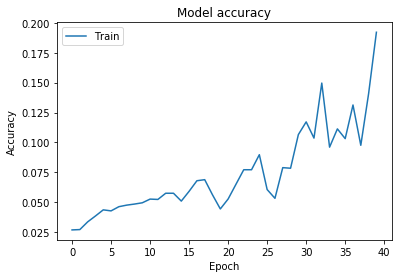

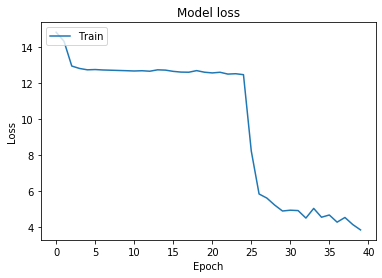

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 12
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(new_size[0], new_size[1], 3)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(257, activation='relu'),
])

model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

print(train_cnn.shape)
# train_cnn = np.expand_dims(tra, axis = 3)
# train_cnn = np.expand_dims(train_cnn, axis = 3)
# train_cnn = np.expand_dims(train_cnn, axis = 3)
print(train_cnn.shape)
history = model.fit(
  train_cnn,
  output_data,
  epochs = 40,
  validation_data=(train_cnn, output_data),
)


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()